## Ant Colony Optimization algorithm  (ACOA) as an optimizer for training a NN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization



le = LabelEncoder()
rScaler = RobustScaler()

In [3]:
path="D:/amith/christ stuff/4th year/final year project/ACO/bin_data.csv"
bin_data=pd.read_csv(path)
bin_data

,Unnamed: 0,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,...,False,False,False,False,True,False,1,False,True,normal
1,1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,...,False,False,False,False,True,False,1,False,True,normal
2,2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,...,True,False,False,False,False,False,0,True,False,abnormal
3,3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,...,False,False,False,False,True,False,1,False,True,normal
4,4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,...,False,False,False,False,True,False,1,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,...,True,False,False,False,False,False,0,True,False,abnormal
125969,125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,...,False,False,False,False,True,False,1,False,True,normal
125970,125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,...,False,False,False,False,True,False,1,False,True,normal
125971,125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,...,True,False,False,False,False,False,0,True,False,abnormal


In [4]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [6]:
#splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [7]:
def Fobj():
    mlp = Sequential() # creating model
    # adding input layer and first layer with 50 neurons
    # X_train.shape is (94479, 93)
    mlp.add(Dense(units=33, input_dim=X_train.shape[1], activation='relu'))#50x93=4650
    # output layer with sigmoid activation
    mlp.add(Dense(units=1,activation='sigmoid'))
    return mlp
# len(Fobj().get_weights()[1])
# Fobj().get_weights()[0].flatten().shape[0]

In [9]:
# mlp=Fobj()
# # defining loss function, optimizer, metrics and then compiling model
# mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# dim=0;
# for i in range(len(mlp.get_weights())):# 4 for 4 array 
#     dim=dim+mlp.get_weights()[i].flatten().shape[0]# 4650+50+50+1=4751
# # dim = 4751
# # print(math.sqrt(dim))
# N=20# Population size
# X=np.zeros((N,dim)) #(20, 4751)
# # print(X[:,:3])
# Fit=np.ones(N)*float('inf') #(20, 1)
# # print(Fit.reshape(N,1))
# bF=float('inf')
# bPos=[];
# # print(len(mlp.get_weights()))#4
# # len(mlp.layers)#2

In [10]:
# get wights and bias Y=XW+bias 
def setWeights(X):
    Len=0
    # X is each row data in datasets X and len is 4751
    # len(mlp.layers is 2 each contain 4 array
    for i in range(0,len(mlp.layers)):
#         get Wights first from layers
        a=mlp.layers[i].get_weights()[0].shape
        weights=X[Len:(Len+mlp.layers[i].get_weights()[0].flatten().shape[0])]
        weights=np.reshape(weights,a) 
        Len=Len+mlp.layers[i].get_weights()[0].flatten().shape[0]
#         get bias first from layers
        a=mlp.layers[i].get_weights()[1].shape
        bias=X[Len:(Len+mlp.layers[i].get_weights()[1].flatten().shape[0])]
        bias=np.reshape(bias,a)
        Len=Len+mlp.layers[i].get_weights()[1].flatten().shape[0]
        mlp.layers[i].set_weights([weights,bias])
#         print(len(mlp.get_weights()))#4
#         len(mlp.layers)#4


In [11]:
def check_boundaries(X):
    for j in range(dim):
        if X[j]>U_bounds:
            X[j]=(L_bounds+np.random.random(1)*(U_bounds-L_bounds))
        elif  X[j]<L_bounds:
            X[j]=(L_bounds+np.random.random(1)*(U_bounds-L_bounds))

In [12]:
L_bounds=0;
U_bounds=1;
def initialization():
    for i in range(N):
        for j in range(dim):
            X[i][j]=(L_bounds+np.random.rand(1)*(U_bounds-L_bounds))
        setWeights(X[i,:])
        print("------------Solution ",i,"-------------")
        score=mlp.evaluate(X_train, y_train, verbose = 1) 
        Fit[i]= score[0]#loss
        print(score[1])#accurcy


In [13]:
#get numner node visted and probility
def pick_move(distances,pheromone, visited,alpha=1,beta=1):
    all_inds = range(len(distances))
    pheromone = np.copy(pheromone)
    # print(pheromone)
    pheromone[list(visited)] = 0
    # print(pheromone[list(visited)])
    row = pheromone ** alpha * (( 1.0 / distances) ** beta)
    # h=f"""
    # {pheromone} ** {alpha} * (( 1.0 / {dist}) ** {beta})
    # """
    # print(h)
    # print(row)
    norm_row = row / row.sum()#probility
    # print(norm_row)
    move = np_choice(all_inds, 1, p=norm_row)[0]
    return move #3

In [14]:
#get path each node
def gen_path(distances,pheromone,start=0):
    path = []
    visited = set()
    visited.add(start)
    prev = start
    for i in range(len(distances) - 1):
        move = pick_move(distances[prev],pheromone[prev], visited)
        path.append((prev, move))
        prev = move
        visited.add(move)
        # print(f"move: {move} prev:{prev} visited: {visited}")
        # print(f"-- path {path}")
    path.append((prev, start)) # going back to where we started   
    # print(f"path {path}")
    return path

In [15]:
#get distance each node
def gen_path_dist(distances,path):
    total_dist = 0
    # get values shortest path after
    total_value=list()
    for ele in path:
          total_value.append(distances[ele])
          total_dist +=distances[ele]
    #     print(f"{ele} : {distances[ele]}")
    # print(f"total_dist: {total_dist}")
    return total_dist,total_value

In [16]:
#get distance each node and path in all_path
def gen_all_paths(distances,pheromone,n_ants):
    all_paths = []
    for i in range(n_ants):
        path = gen_path(distances,pheromone)
        genPathDist,_=gen_path_dist(distances,path)
        all_paths.append((path, genPathDist))
    return all_paths

In [17]:
def spread_pheronome(distances,pheromone ,all_paths, n_best, shortest_path):
    # sorted the paths by distance
    sorted_paths = sorted(all_paths, key=lambda x: x[1])
    # print(f"sorted_paths : {sorted_paths}")
    for path, dist in sorted_paths[:n_best]:
        for move in path:
            #update pheromone values 
            pheromone[move] += 1.0 / distances[move]
    return pheromone

In [18]:
def run(distances, n_ants, n_best, n_iterations, decay):
    all_inds = range(len(distances))
    pheromone = np.ones(distances.shape) / len(distances)
    shortest_path = None
    all_time_shortest_path = ("placeholder", np.inf)
    for i in range(n_iterations):
        #get distance each node and path in all_path
        all_paths = gen_all_paths(distances,pheromone,n_ants)
        # print(f"all_paths : {all_paths}")
        pheromone=spread_pheronome(distances,pheromone ,all_paths, n_best, shortest_path=shortest_path)
        shortest_path = min(all_paths, key=lambda x: x[1])
#         print (shortest_path)
        # swap the smallest value of shortest_path
        if shortest_path[1] < all_time_shortest_path[1]:
            all_time_shortest_path = shortest_path            
        pheromone = pheromone * decay 
    return all_time_shortest_path

# Load the NSL_KDD dataset

In [19]:
dfTrain=pd.read_csv("D:/amith/christ stuff/4th year/final year project/ACO/NSL_KDD_Train.csv",sep=",",encoding="utf-8")

In [20]:
dfTrain.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [21]:
dfTrain.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,150,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
dfTrain.shape

(125972, 42)

In [23]:
#Check types for all the columns using dtypes
dfTrain.dtypes

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.19        float64
0.20        float64
0.21        float64
0.22        float64
1           float64
0.23        float64
0.24        float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.25        float64
0.26        float64
0.27        float64
0.05        float64
0.28        float64
normal       object
dtype: object

In [24]:
dfTrain.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [25]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class'])

dfTrain.columns = columns

dfTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [26]:
dfTrain["class"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [27]:
dfTrain['class'] = (dfTrain['class'] != "normal") * 1

dfTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


<AxesSubplot: xlabel='protocol_type', ylabel='count'>

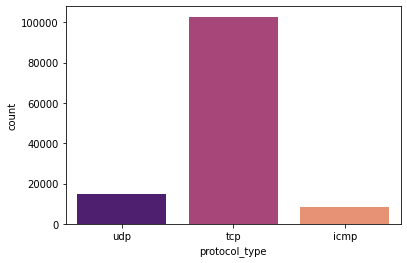

In [28]:
sns.countplot(x=dfTrain["protocol_type"],palette="magma")


<AxesSubplot: ylabel='count'>

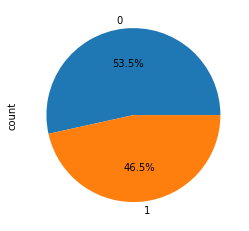

In [29]:
round(dfTrain["class"].value_counts()/dfTrain.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

<AxesSubplot: xlabel='class', ylabel='count'>

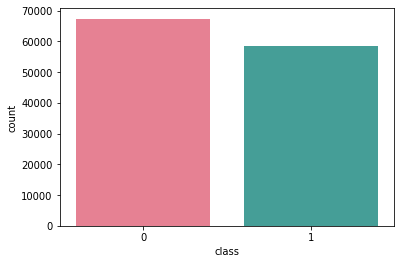

In [30]:
sns.countplot(x=dfTrain["class"],palette="husl")


In [31]:
dfTrain.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [32]:
dfTrain.duplicated().any()


True

In [33]:
dfTrain.drop_duplicates(keep=False,inplace=True)


In [34]:
dfTrain.duplicated().any()


False

In [35]:
print(dfTrain.shape)


(125955, 42)


array([[<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'src_bytes'}>,
        <AxesSubplot: title={'center': 'dst_bytes'}>,
        <AxesSubplot: title={'center': 'land'}>,
        <AxesSubplot: title={'center': 'wrong_fragment'}>,
        <AxesSubplot: title={'center': 'urgent'}>],
       [<AxesSubplot: title={'center': 'hot'}>,
        <AxesSubplot: title={'center': 'num_failed_logins'}>,
        <AxesSubplot: title={'center': 'logged_in'}>,
        <AxesSubplot: title={'center': 'num_compromised'}>,
        <AxesSubplot: title={'center': 'root_shell'}>,
        <AxesSubplot: title={'center': 'su_attempted'}>],
       [<AxesSubplot: title={'center': 'num_root'}>,
        <AxesSubplot: title={'center': 'num_file_creations'}>,
        <AxesSubplot: title={'center': 'num_shells'}>,
        <AxesSubplot: title={'center': 'num_access_files'}>,
        <AxesSubplot: title={'center': 'num_outbound_cmds'}>,
        <AxesSubplot: title={'center': 'is_host_

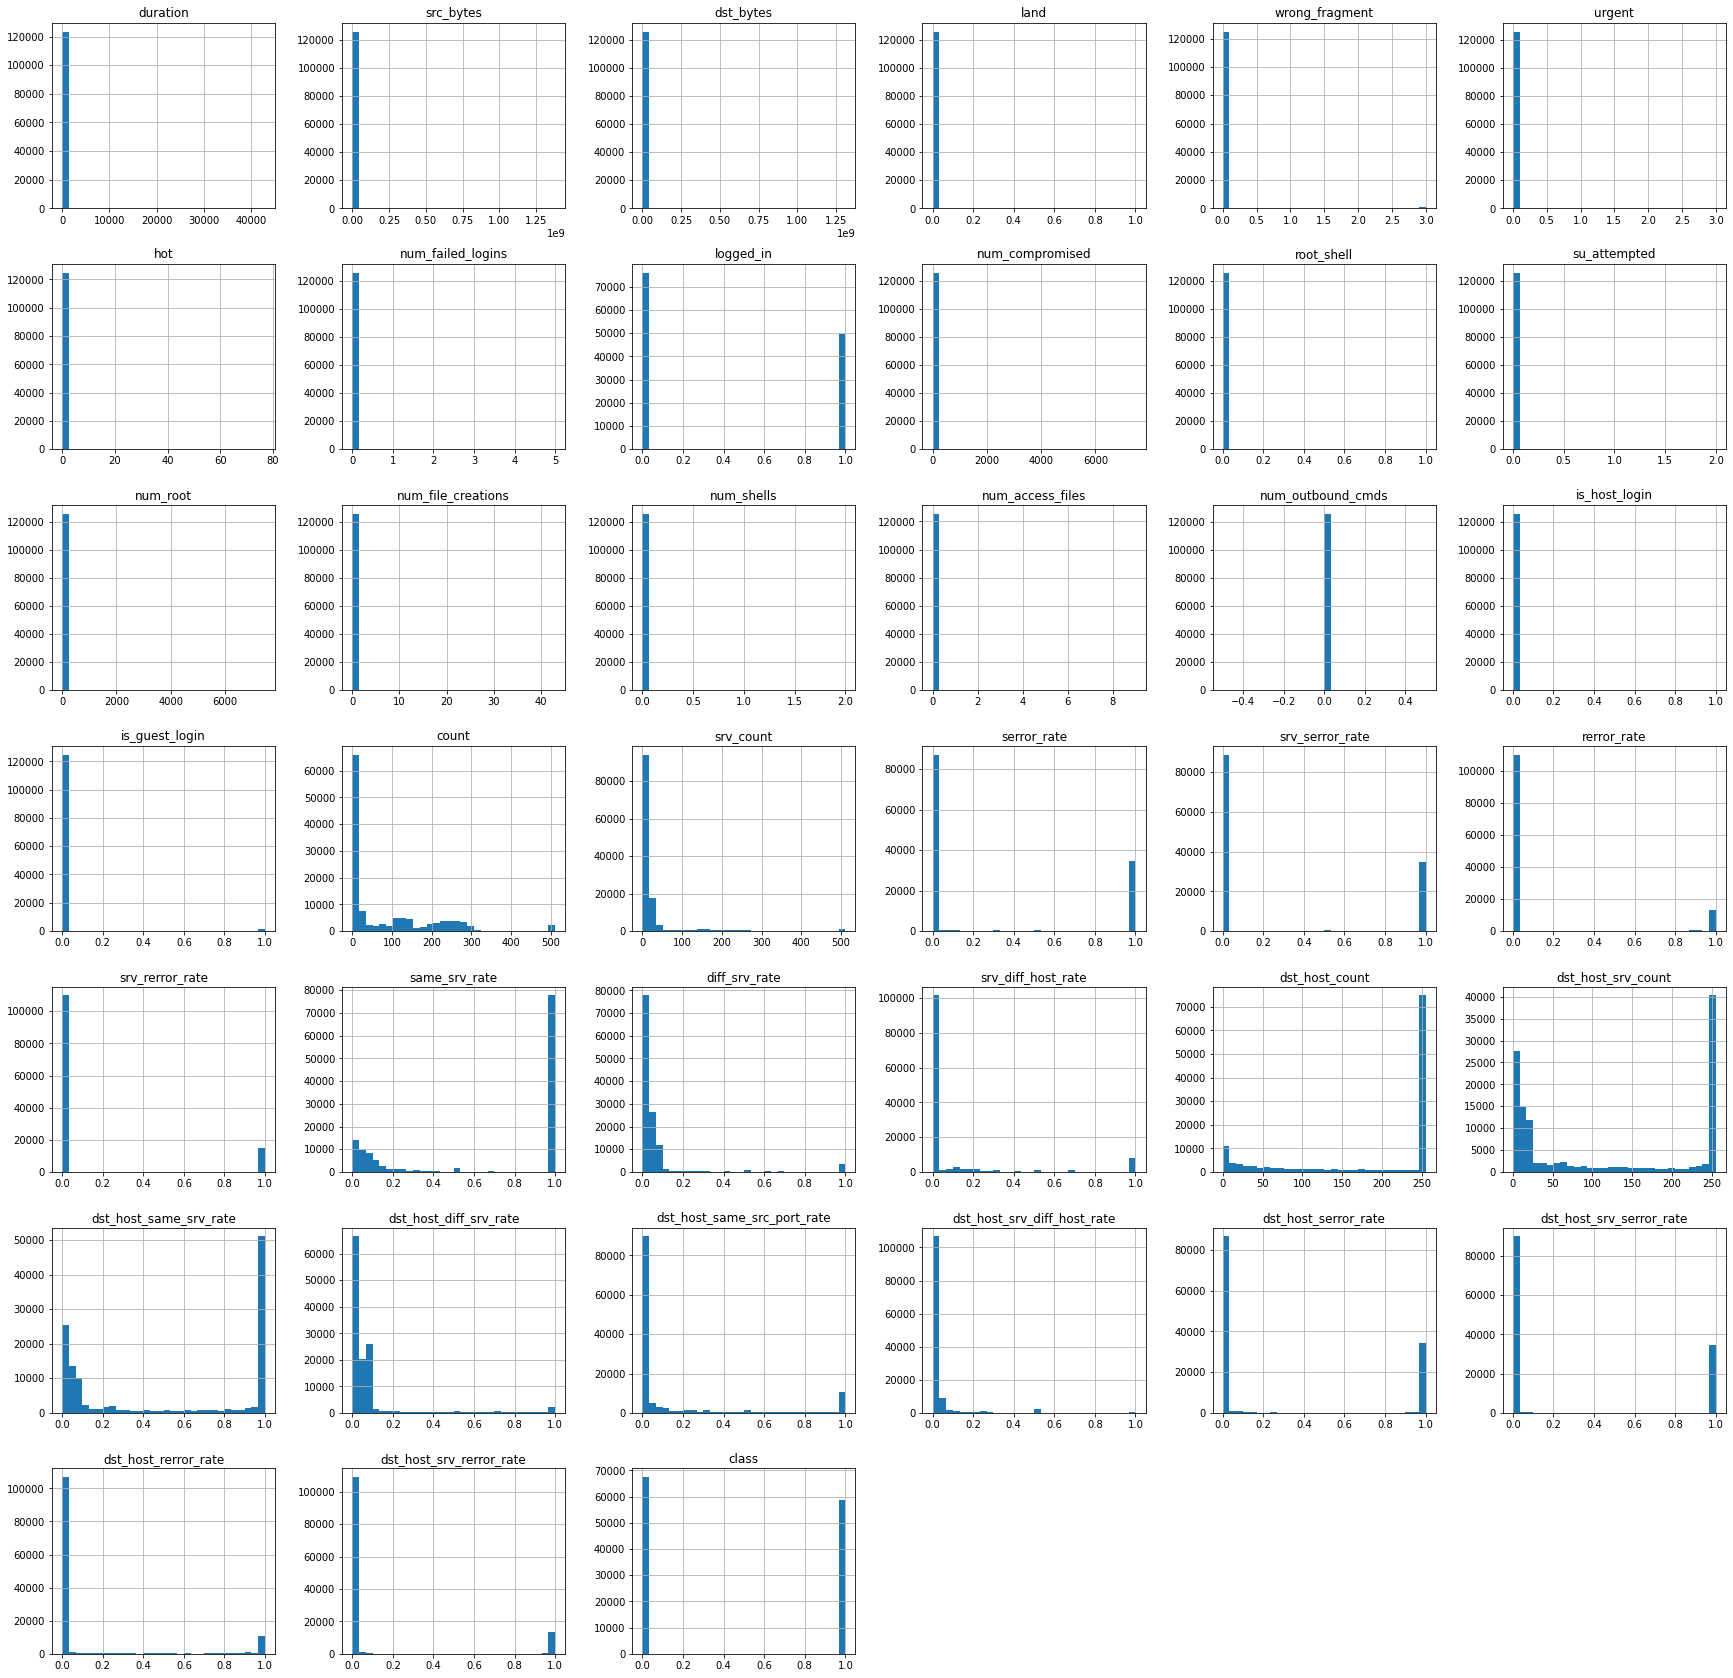

In [36]:
# drawing hist plot graphs for all columns
dfTrain.hist(bins=30,figsize=[30,30])

In [37]:
# transforming the datatype (Encoding)
dfTrain['protocol_type'] = le.fit_transform(dfTrain['protocol_type'])
dfTrain['service'] = le.fit_transform(dfTrain['service'])
dfTrain['flag'] = le.fit_transform(dfTrain['flag'])

In [38]:
# getting all possible values in column by using value_counts() function
print(dfTrain["protocol_type"].value_counts())
print(dfTrain["service"].value_counts())
print(dfTrain["flag"].value_counts())

protocol_type
1    102688
2     14993
0      8274
Name: count, dtype: int64
service
24    40338
49    21853
12     9043
54     7313
20     6859
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64
flag
9     74927
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64


In [39]:
dfTrain.dtypes


duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

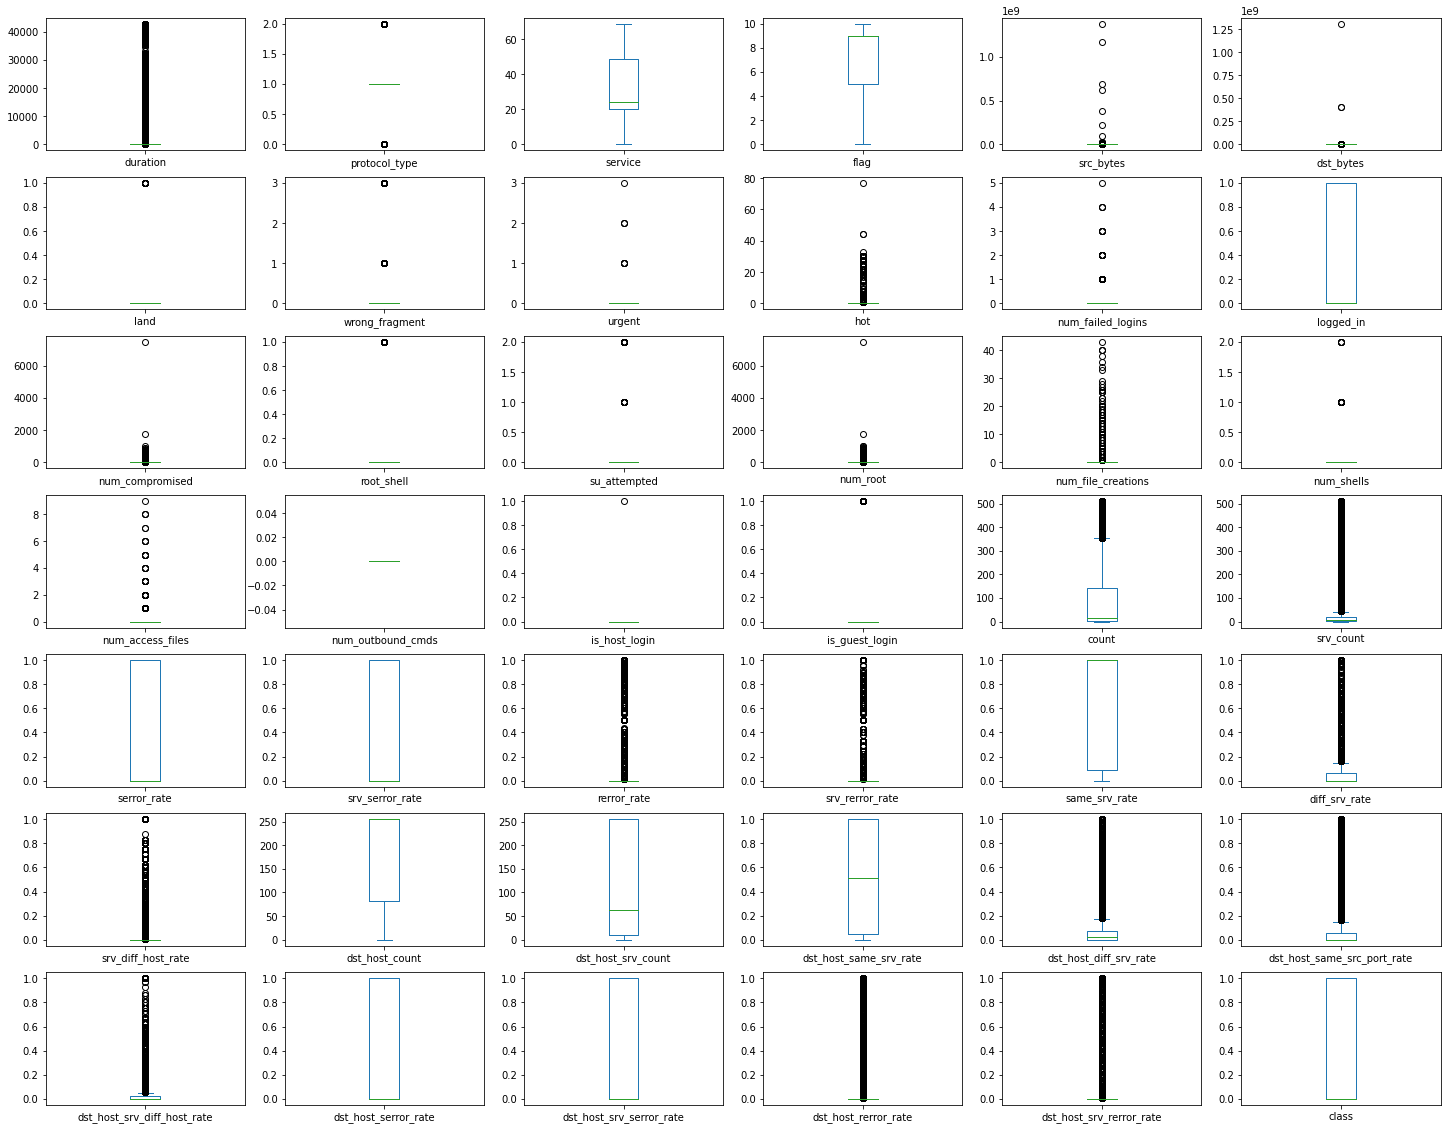

In [40]:
# drawing a box plots for all columns

dfTrain.plot(kind='box', subplots=True, layout=(7,6), figsize=(25,20))
plt.show()

In [41]:
x = dfTrain.drop(['class'], axis=1)
y = dfTrain['class'].copy()

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state=42)

In [42]:
x_train.shape


(94466, 41)

In [43]:
y_train.shape


(94466,)

In [44]:
x_test.shape


(31489, 41)

In [45]:
x_train = rScaler.fit_transform(x_train)
x_test = rScaler.fit_transform(x_test)

In [64]:
# import numpy as np
# from sklearn.metrics import accuracy_score
# class ACO:
#     def __init__(self, n_ants, n_features, alpha, beta, evaporation_rate):
#         self.n_ants = n_ants
#         self.n_features = n_features
#         self.alpha = alpha
#         self.beta = beta
#         self.evaporation_rate = evaporation_rate

#         self.pheromones = np.ones(self.n_features)

#     def run(self, X_train, y_train):
#         ants = []
#         for i in range(self.n_ants):
#             ant = np.random.randint(0, 2, self.n_features)
#             ants.append(ant)

#         for iteration in range(100):
#             for ant in ants:
#                 for i in range(self.n_features - 1):
#                     j = np.argmax(self.pheromones[i] * (1 - ant[i]) + self.pheromones[i + 1] * ant[i])
#                     ant[i + 1] = j

#             # Evaluate the ants
#             predictions = np.array([self.predict(ant, X_train) for ant in ants])
#             accuracies = accuracy_score(y_train, predictions)

#             # Update the pheromone levels
#             for i in range(self.n_features):
#                 for j in range(self.n_features):
#                     self.pheromones[i] *= (1 - self.evaporation_rate)
#                     self.pheromones[i] += accuracies[j] * self.pheromones[j]

#         return ants[np.argmax(accuracies)]

#     def predict(self, ant, X):
#         features = np.dot(ant, X.T)
#         return np.argmax(features)


# import numpy as np
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# class ACO:
#     def __init__(self, n_ants, n_features, alpha, beta, evaporation_rate):
#         self.n_ants = n_ants
#         self.n_features = n_features
#         self.alpha = alpha
#         self.beta = beta
#         self.evaporation_rate = evaporation_rate

#         self.pheromones = np.ones(self.n_features)

#     def run(self, X_train, y_train):
#         ants = []
#         for i in range(self.n_ants):
#             ant = np.random.randint(0, 2, self.n_features)
#             ants.append(ant)

#         for iteration in range(100):
#             for ant in ants:
#                 for i in range(self.n_features - 1):
#                     j = np.argmax(self.pheromones[i] * (1 - ant[i]) + self.pheromones[i + 1] * ant[i])
#                     ant[i + 1] = j

#             # Evaluate the ants' feature selections
#             accuracies = []
#             for ant in ants:
#                 features_selected = np.array(ant).astype(bool)
#                 x_train_selected = X_train[:, features_selected]
#                 if np.sum(features_selected) == 0:
#                     continue  # Skip if no features are selected
#                 classifier = DecisionTreeClassifier()  # Use DecisionTreeClassifier as an example
#                 classifier.fit(x_train_selected, y_train)
#                 predictions = classifier.predict(x_train_selected)
#                 acc = accuracy_score(y_train, predictions)
#                 accuracies.append(acc)

#             if not accuracies:
#                 continue

#             # Update the pheromone levels
#             for i in range(self.n_features):
#                 for j in range(self.n_features):
#                     self.pheromones[i] *= (1 - self.evaporation_rate)
#                     self.pheromones[i] += accuracies[j] * self.pheromones[j]

#         best_ant_idx = np.argmax(accuracies)
#         return ants[best_ant_idx]

# # Initialize the ACO algorithm
# aco = ACO(100, x_train.shape[1], 1, 1, 0.1)

# # Run the ACO algorithm to get the best feature selection
# best_ant = aco.run(x_train, y_train)

# # Apply the selected features to the training and test data
# features_selected = np.array(best_ant).astype(bool)
# x_train_selected = x_train[:, features_selected]
# x_test_selected = x_test[:, features_selected]

# # Train a classifier on the selected features
# classifier = DecisionTreeClassifier()  # You can change this classifier
# classifier.fit(x_train_selected, y_train)

# # Make predictions on the test data
# predictions = classifier.predict(x_test_selected)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, predictions)

# print("Accuracy:", accuracy)

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded and split into x_train, x_test, y_train, and y_test

# Data preprocessing: Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

class ACO:
    def __init__(self, n_ants, n_features, alpha, beta, evaporation_rate):
        self.n_ants = n_ants
        self.n_features = n_features
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate

        self.pheromones = np.ones(self.n_features)

    def run(self, X_train, y_train):
        ants = []
        for i in range(self.n_ants):
            ant = np.random.randint(0, 2, self.n_features)
            ants.append(ant)

        best_accuracy = 0.0
        best_ant = None

        for iteration in range(100):
            for ant in ants:
                for i in range(self.n_features - 1):
                    j = np.argmax(self.pheromones[i] * (1 - ant[i]) + self.pheromones[i + 1] * ant[i])
                    ant[i + 1] = j

            # Evaluate the ants' feature selections
            accuracies = []
            for ant in ants:
                features_selected = np.array(ant).astype(bool)
                x_train_selected = X_train[:, features_selected]
                if np.sum(features_selected) == 0:
                    continue  # Skip if no features are selected
                classifier = DecisionTreeClassifier()
                classifier.fit(x_train_selected, y_train)
                predictions = classifier.predict(x_train_selected)
                acc = accuracy_score(y_train, predictions)
                accuracies.append(acc)

            if not accuracies:
                continue

            # Update the pheromone levels
            for i in range(self.n_features):
                for j in range(self.n_features):
                    self.pheromones[i] *= (1 - self.evaporation_rate)
                    self.pheromones[i] += accuracies[j] * self.pheromones[j]

            # Track the best ant and accuracy
            max_accuracy = max(accuracies)
            if max_accuracy > best_accuracy:
                best_accuracy = max_accuracy
                best_ant = ants[np.argmax(accuracies)]

        return best_ant

# Initialize the ACO algorithm
aco = ACO(100, x_train.shape[1], 1, 1, 0.1)

# Run the ACO algorithm to get the best feature selection
best_ant = aco.run(x_train, y_train)

# Apply the selected features to the training and test data
features_selected = np.array(best_ant).astype(bool)
x_train_selected = x_train[:, features_selected]
x_test_selected = x_test[:, features_selected]

# Train a classifier on the selected features
classifier = DecisionTreeClassifier()
classifier.fit(x_train_selected, y_train)

# Make predictions on the test data
predictions = classifier.predict(x_test_selected)

# Calculate accuracy, F1-score, and precision
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Precision:", precision)




Accuracy: 0.5401886373019149
F1-Score: 0.02465476591444931
Precision: 0.7261904761904762


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

class ACO:
    def __init__(self, n_ants, n_features, alpha, beta, evaporation_rate):
        self.n_ants = n_ants
        self.n_features = n_features
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate

        self.pheromones = np.ones(self.n_features)

    def run(self, X_train, y_train):
        # ... (Your ACO algorithm implementation, as previously provided)

# Define file paths for each category's CSV file
category_files = {
    'DoS': 'D:/amith/christ stuff/4th year/final year project/NSL KDD 99 dataset/NSL-KDD/X_rfeDoS.csv',
    'Probe': 'D:/amith/christ stuff/4th year/final year project/NSL KDD 99 dataset/NSL-KDD/X_rfeProbe.csv',
    'R2L': 'D:/amith/christ stuff/4th year/final year project/NSL KDD 99 dataset/NSL-KDD/X_rfeR2L.csv',
    'U2R': 'D:/amith/christ stuff/4th year/final year project/NSL KDD 99 dataset/NSL-KDD/X_rfeU2R.csv'
}

# Define a dictionary to store the accuracies
accuracies = {}

# Loop through each category
for category, file_path in category_files.items():
    # Load the data for the category from the CSV file
    data = pd.read_csv(file_path)
    
    # Extract features (X) and labels (y) from the data
    X = data.values  # Assuming the labels are in the last column
    y = X[:, -1]  # Assuming the labels are in the last column
    X = X[:, :-1]  # Remove the label column
    
    # Encode labels if needed (e.g., for classification)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Apply the ACO algorithm to get the best feature selection
    aco = ACO(100, X.shape[1], 1, 1, 0.1)
    best_ant = aco.run(X, y_encoded)
    
    # Apply the selected features to the data
    features_selected = np.array(best_ant).astype(bool)
    X_selected = X[:, features_selected]
    
    # Train a classifier on the selected features
    classifier = DecisionTreeClassifier()  # You can change this classifier
    classifier.fit(X_selected, y_encoded)
    
    # Make predictions on the data
    predictions = classifier.predict(X_selected)
    
    # Calculate and store the accuracy
    accuracy = accuracy_score(y_encoded, predictions)
    accuracies[category] = accuracy

# Print the accuracies for each category
for category, accuracy in accuracies.items():
    print(f'Accuracy for {category}: {accuracy:.2f}')


In [77]:
# although looks like ACO it uses RFE
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded and split into x_train, x_test, y_train, and y_test

# Data preprocessing: Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

class ACO:
    def __init__(self, n_ants, n_features, evaporation_rate):
        self.n_ants = n_ants
        self.n_features = n_features
        self.evaporation_rate = evaporation_rate

    def run(self, X_train, y_train):
        ants = []
        for i in range(self.n_ants):
            ant = np.random.randint(0, 2, self.n_features)
            ants.append(ant)

        best_accuracy = 0.0
        best_ant = None

        for iteration in range(100):
            for ant in ants:
                # Apply the selected features to the data
                features_selected = np.array(ant).astype(bool)
                X_train_selected = X_train[:, features_selected]
                if np.sum(features_selected) == 0:
                    continue  # Skip if no features are selected

                # Use Random Forest as an example classifier
                classifier = RandomForestClassifier(n_estimators=100, random_state=42)
                classifier.fit(X_train_selected, y_train)
                predictions = classifier.predict(X_train_selected)
                accuracy = accuracy_score(y_train, predictions)

                # Update the best ant if this one is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_ant = ant

            # Update the pheromone levels
            if best_ant is not None:
                for i in range(self.n_features):
                    for j in range(self.n_features):
                        self.pheromones[i] *= (1 - self.evaporation_rate)
                        self.pheromones[i] += best_ant[j] * self.pheromones[j]

        return best_ant

# Initialize the ACO algorithm
aco = ACO(100, x_train.shape[1], 0.1)

# Run the ACO algorithm to get the best feature selection
best_ant = aco.run(x_train, y_train)

# Apply the selected features to the training and test data
features_selected = np.array(best_ant).astype(bool)
x_train_selected = x_train[:, features_selected]
x_test_selected = x_test[:, features_selected]

# Train a classifier on the selected features
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_selected, y_train)

# Make predictions on the test data
predictions = classifier.predict(x_test_selected)

# Calculate accuracy, F1-score, and precision
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Precision:", precision)


AttributeError: 'ACO' object has no attribute 'pheromones'

In [78]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the ACO class
class ACOFeatureSelection:
    def __init__(self, n_ants, n_features, alpha, beta, evaporation_rate):
        self.n_ants = n_ants
        self.n_features = n_features
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromones = np.ones(self.n_features)

    def run(self, X_train, y_train):
        ants = []
        for _ in range(self.n_ants):
            ant = np.random.randint(0, 2, self.n_features)
            ants.append(ant)

        best_accuracy = 0.0
        best_ant = None

        for _ in range(100):
            for ant in ants:
                for i in range(self.n_features - 1):
                    if self.pheromones[i] != 0:
                        prob_select_next = (self.pheromones[i] * (1 - ant[i]) + self.pheromones[i + 1] * ant[i]) / self.pheromones[i]
                    else:
                        prob_select_next = 0
                    prob_select_next = min(max(prob_select_next, 0), 1)

                    if np.random.rand() <= prob_select_next:
                        ant[i + 1] = 1
                    else:
                        ant[i + 1] = 0

            accuracies = []
            for ant in ants:
                features_selected = np.array(ant).astype(bool)
                x_train_selected = X_train[:, features_selected]
                if np.sum(features_selected) == 0:
                    continue
                classifier = DecisionTreeClassifier()
                classifier.fit(x_train_selected, y_train)
                predictions = classifier.predict(x_train_selected)
                acc = accuracy_score(y_train, predictions)
                accuracies.append(acc)

            if not accuracies:
                continue

            for i in range(self.n_features):
                for j in range(self.n_features):
                    self.pheromones[i] *= (1 - self.evaporation_rate)
                    self.pheromones[i] += accuracies[j] * self.pheromones[j]

            max_accuracy = max(accuracies)
            if max_accuracy > best_accuracy:
                best_accuracy = max_accuracy
                best_ant = ants[np.argmax(accuracies)]

        return best_ant

# Load your dataset
data = pd.read_csv('D:/amith/christ stuff/4th year/final year project/NSL KDD 99 dataset/NSL_KDD_Test.csv')

# Extract features (X) and labels (y) from the data
X = data.values[:, :-1]
y = data.values[:, -1]

# Encode labels if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize the ACO algorithm
aco = ACOFeatureSelection(n_ants=100, n_features=X.shape[1], alpha=1, beta=1, evaporation_rate=0.1)

# Run the ACO algorithm to get the best feature selection
best_ant = aco.run(X, y_encoded)

# Apply the selected features to the data
features_selected = np.array(best_ant).astype(bool)
X_selected = X[:, features_selected]

# Train a classifier on the selected features
classifier = DecisionTreeClassifier()
classifier.fit(X_selected, y_encoded)

# Make predictions on the data
predictions = classifier.predict(X_selected)

# Calculate and print the accuracy
accuracy = accuracy_score(y_encoded, predictions)
print(f'Accuracy: {accuracy:.2f}')


ValueError: could not convert string to float: 'tcp'